In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [21]:
def cv_imshow(img, cmap='gray', figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB), cmap=cmap)

In [22]:
img1 = cv.imread("vitalur.png")
img2 = cv.imread("vitalurs.jpg")

In [33]:
sift = cv.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

FLAN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch (descriptors1, descriptors2,k=2)
matchesMask = [[0,0] for i in range(len(matches))]

good_matches = []
for i,(m1, m2) in enumerate (matches):
  if m1.distance < 0.5 * m2.distance:
    matchesMask[i] = [1,0]

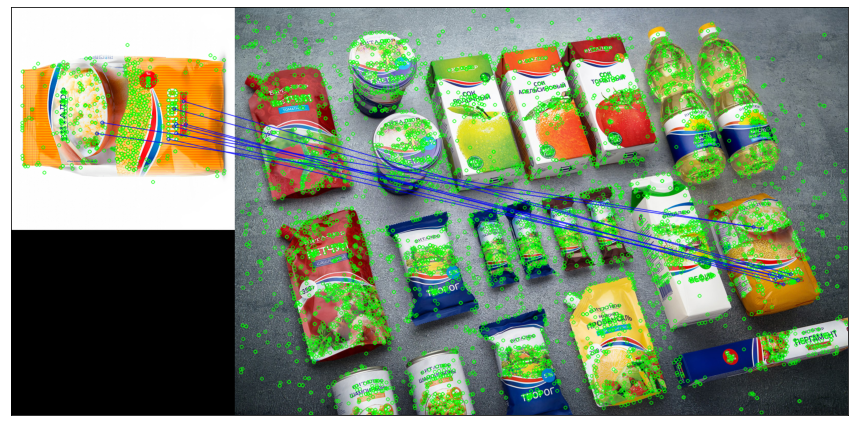

In [34]:
draw_params = dict (matchColor = (255,0,), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=0 )
flann_matches =cv.drawMatchesKnn(img1, keypoints1, img2, keypoints2, matches, None,**draw_params)
cv_imshow(flann_matches, cmap=None, figsize=(15, 15))